In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
ds=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [4]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ds.shape

(1338, 7)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_20/2322780217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['age'])


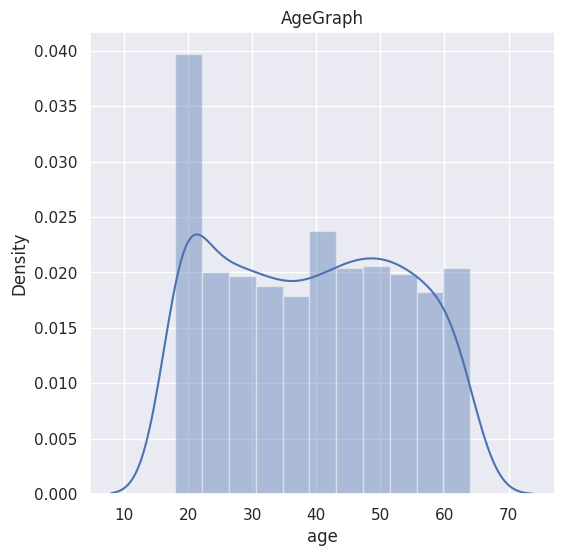

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ds['age'])
plt.title('AgeGraph')
plt.show()

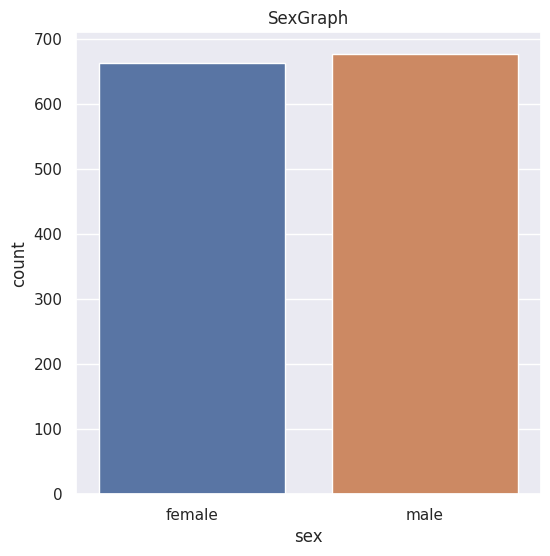

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ds)
plt.title('SexGraph')
plt.show()

In [11]:
ds['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_20/1025247332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['bmi'])


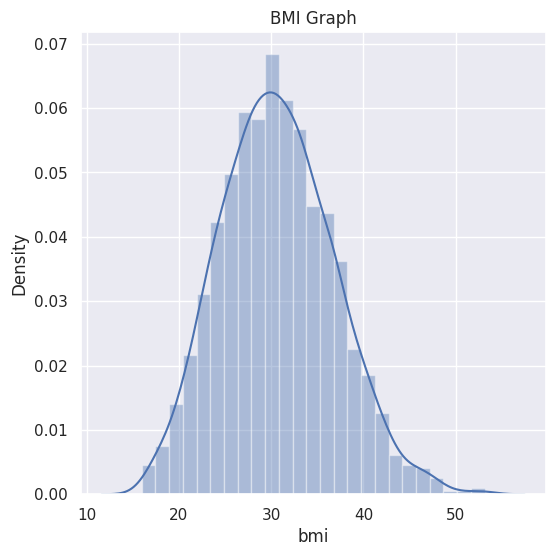

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(ds['bmi'])
plt.title('BMI Graph')
plt.show()

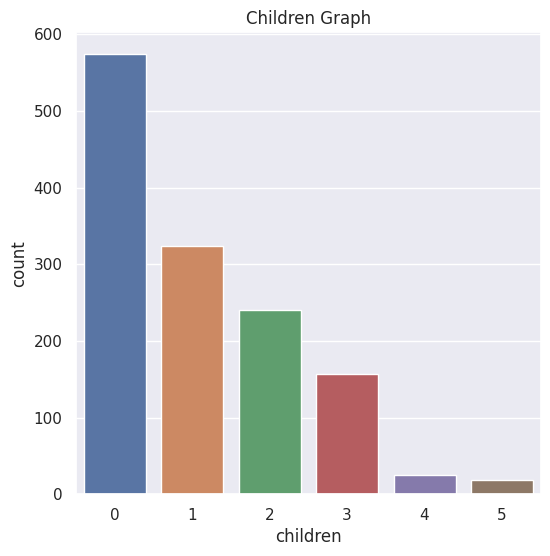

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ds)
plt.title('Children Graph')
plt.show()

In [14]:
ds['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

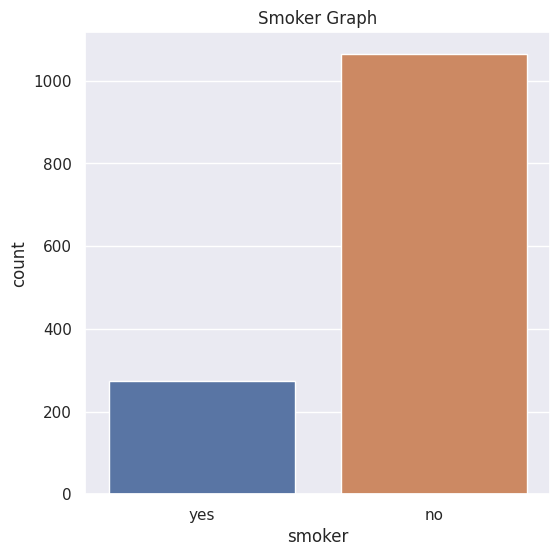

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ds)
plt.title('Smoker Graph')
plt.show()

In [16]:
ds['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

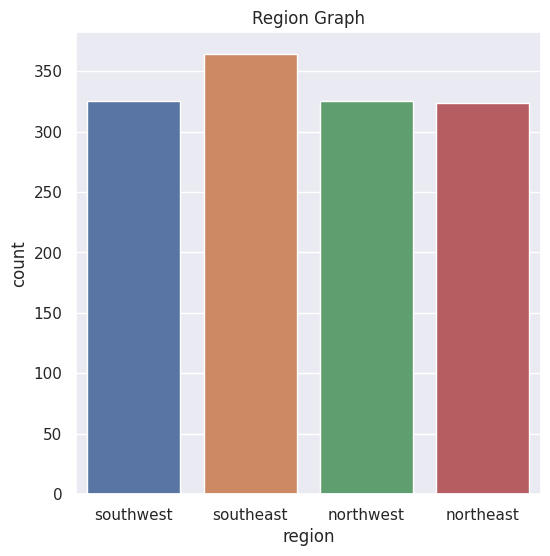

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ds)
plt.title('Region Graph')
plt.show()

In [18]:
ds['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_20/386824641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['charges'])


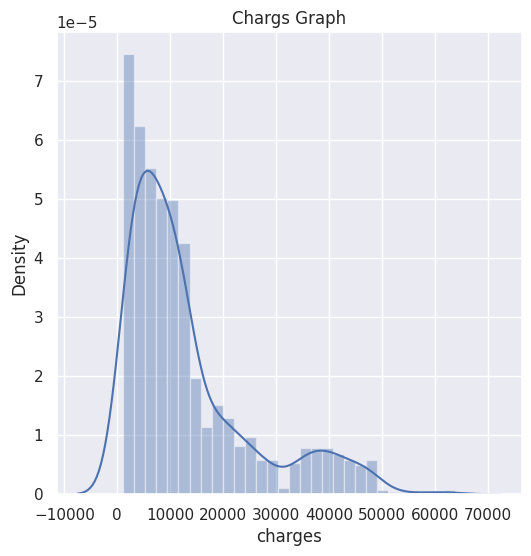

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(ds['charges'])
plt.title('Chargs Graph')
plt.show()

In [20]:
ds['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [21]:
ds.replace({'sex':{'male':0,'female':1}},inplace=True)
ds.replace({'smoker':{'yes':0,'no':1}},inplace=True)
ds.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [22]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [23]:
x=ds.drop(columns='charges',axis=1)
y=ds['charges']

In [24]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [25]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [28]:
regressor=LinearRegression()

In [29]:
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
training_data_prediction=regressor.predict(x_train)

In [31]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.7413131194887537


In [32]:
test_data_prediction=regressor.predict(x_test)

In [33]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.783021587162344


In [34]:
id=(30,1,35.3,0,0,1)
id_as_numpy_array=np.asarray(id)
id_reshaped=id_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(id_reshaped)
print(prediction)
print('The cost is :',prediction[0])

[30802.1852122]
The cost is : 30802.18521220246


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [36]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [38]:
y_pred1=svm.predict(x_test)
y_pred2=rf.predict(x_test)
y_pred3=gr.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'svm':y_pred1,'rf':y_pred2,'gr':y_pred3})

In [39]:
df1

,Actual,svm,rf,gr
764,9095.06825,9548.336385,11192.946535,10810.952230
887,5272.17580,9492.895666,5330.660849,5837.446283
890,29330.98315,9648.496688,28338.049182,27621.536382
1293,9301.89355,9555.134916,10943.081504,9924.440767
259,33750.29180,9421.005499,34759.924086,33517.594584
...,...,...,...,...
109,47055.53210,9648.631901,47274.524467,45901.005642
575,12222.89830,9625.226197,12030.179397,12306.163109
535,6067.12675,9504.351525,6184.226934,6577.338535
543,63770.42801,9604.916913,46745.562172,48308.211959


In [40]:
import matplotlib.pyplot as plt

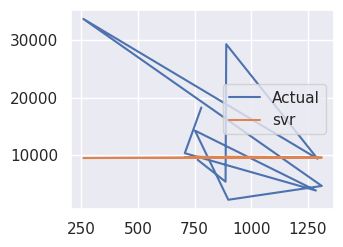

In [41]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.tight_layout()
plt.legend()

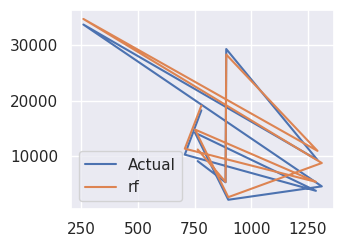

In [42]:
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.tight_layout()
plt.legend()

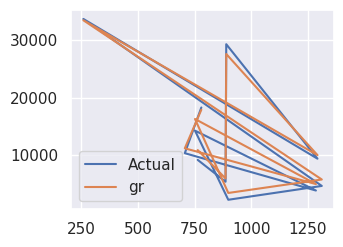

In [43]:
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [44]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [45]:
print(score1,score2,score3)

-0.07230132392530098 0.8625316840180417 0.8798261713029993


In [46]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)

In [47]:
print(s1,s2,s3)

8592.584329956198 2572.680542214925 2402.6776959562403


In [48]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [49]:
new_pred=gr.predict(df)
print(new_pred)

[10719.2430335]


In [50]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [51]:
new_pred=rf.predict(df)
print(new_pred)

[13704.0992172]


In [52]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [53]:
new_pred=svm.predict(df)
print(new_pred)

[9524.32336833]


In [54]:
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [55]:
import joblib

In [56]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [57]:
model1=joblib.load('model_joblib_gr')

In [58]:
model1.predict(df)

array([10565.7790616])

In [59]:
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [60]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [61]:
model2=joblib.load('model_joblib_rf')

In [62]:
model2.predict(df)

array([14570.3756066])

In [63]:
svm= SVR()
svm.fit(x,y)

SVR()

In [64]:
joblib.dump(svm,'model_joblib_svm')

['model_joblib_svm']

In [65]:
model3=joblib.load('model_joblib_svm')

In [66]:
model3.predict(df)

array([9294.33947106])